In [22]:
% pylab inline
import pandas as pd
import sqlite3
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [16]:
db = sqlite3.connect("/Users/onyame/Dropbox/QuantifiedSelf/btle_backup_20062015_1241.sqlite")

In [46]:
df = pd.read_sql("SELECT * from devices", db,index_col='id')

In [47]:
df.head()

,address,addresstype,devicename,devicetype,firstseen,lastseen,scanresp,manufacturerspecificdatakey,manufacturerspecificdatafield,servicesuuid16,servicesuuid32,servicesuuid128,solicitedservicesuuid16,solicitedservicesuuid128,servicedata
id,,,,,,,,,,,,,,,
1,E1:53:4A:3A:6F:82,None,One,Fitbit One (from device name),22/05/2015 12:24:46,22/05/2015 12:25:01,None,NaN,None,None,None,adab6bc46e7d4601bda2bffaa68956ba,None,None,Device Information (180a): 0504
2,C6:69:71:3C:BB:91,None,One,"Fitbit One (from device name), Fitbit Charge H...",22/05/2015 12:24:42,20/06/2015 12:36:21,None,NaN,None,None,None,adabfb006e7d4601bda2bffaa68956ba,None,None,Device Information (180a): 0506
3,DD:3A:1E:C6:8A:A8,None,estimote,Apple device (from MSData),22/05/2015 14:53:16,20/06/2015 12:36:19,None,76,0215b9407f30f5f8466eaff925556b57fe6d8aa81ec6af,None,None,None,None,None,Device Information (180a): a88ac61e3addafa88ac61e
4,F6:19:23:5D:29:68,None,estimote,Apple device (from MSData),22/05/2015 22:42:13,23/05/2015 10:31:10,None,76,0215b9407f30f5f8466eaff925556b57fe6d2968235db6,None,None,None,None,None,Device Information (180a): 68295d2319f6b668295d23
5,14:99:E2:05:F8:BD,None,None,Apple device (from MSData),23/05/2015 15:46:01,23/05/2015 15:46:01,None,76,09060357c0a8007a,None,None,None,None,None,None


In [48]:
df['devicetype'] = df['devicetype'].str.replace('\(.*\)', '', case=False)

In [49]:
device_types = df.groupby('devicetype').size()
device_names = df.groupby('devicename').size()

In [50]:
device_types

devicetype
Apple device              447
Ericsson device             1
Fitbit Charge               5
Fitbit Charge HR           24
Fitbit Flex                12
Fitbit One                 27
Garmin Device               1
Garmin Vivosmart            1
Google device               1
Jawbone UP24                9
MI                          2
Misfit Wearables Corp       7
Nike device                 5
Nordic device               1
Unknown device            107
dtype: int64

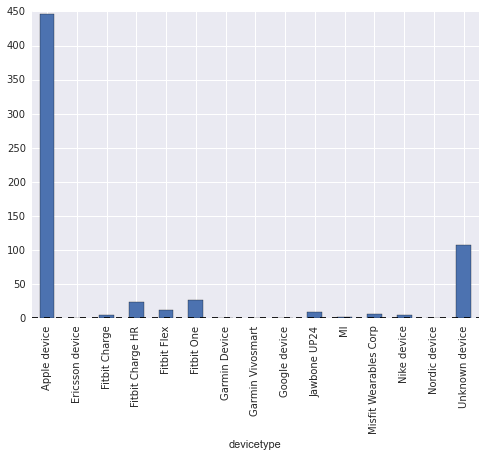

In [51]:
device_types.plot(kind='bar')

In [62]:
device_types.keys()

Index([u'Apple device ', u'Ericsson device ', u'Fitbit Charge ', u'Fitbit Charge HR ', u'Fitbit Flex ', u'Fitbit One ', u'Garmin Device ', u'Garmin Vivosmart ', u'Google device ', u'Jawbone UP24 ', u'MI ', u'Misfit Wearables Corp ', u'Nike device ', u'Nordic device ', u'Unknown device'], dtype='object')

In [63]:
devices = device_types.drop([u'Apple device ',u'Unknown device'])


In [64]:
devices

devicetype
Ericsson device            1
Fitbit Charge              5
Fitbit Charge HR          24
Fitbit Flex               12
Fitbit One                27
Garmin Device              1
Garmin Vivosmart           1
Google device              1
Jawbone UP24               9
MI                         2
Misfit Wearables Corp      7
Nike device                5
Nordic device              1
dtype: int64

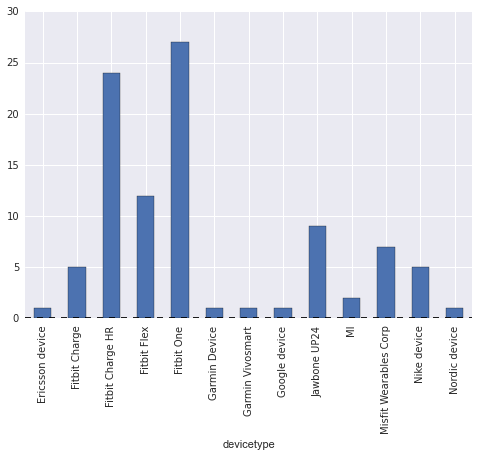

In [65]:
devices.plot(kind='bar')